# tmp -- August 2023

**Motivation**: Scratch notebook used for debugging or other quick things. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display, Latex

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
from register.register import Register

mice = Mice(
    cfg=512,
    full_load=True,
    load_parcel=True,
    load_allen=True,
)
print(mice.kws)

bs = Base(mice, mode='ca2')
reg = Register(mice)

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [3]:
descs = []
for key, f in mice.bold.items():
    descs.append(next(e for e in f.npy_file.split('_') if 'desc' in e))
collections.Counter(descs)

Counter({'desc-rabies-hp': 114})

In [4]:
for key in mice.bold:
    data = Base(
        mice,
        key=key,
        mode='bold-lite',
        prep_data=True,
    ).data
    bad = np.isnan(data).sum(1) > 0
    print(bad.sum(), key)

19 sub-SLC01_ses-1_run-1

19 sub-SLC01_ses-1_run-3

22 sub-SLC01_ses-1_run-5

19 sub-SLC01_ses-1_run-7

8 sub-SLC01_ses-2_run-1

8 sub-SLC01_ses-2_run-3

8 sub-SLC01_ses-2_run-5

8 sub-SLC01_ses-2_run-7

12 sub-SLC01_ses-3_run-1

12 sub-SLC01_ses-3_run-3

12 sub-SLC01_ses-3_run-5

12 sub-SLC01_ses-3_run-7

34 sub-SLC02_ses-1_run-1

34 sub-SLC02_ses-1_run-3

34 sub-SLC02_ses-1_run-5

34 sub-SLC02_ses-1_run-7

10 sub-SLC02_ses-2_run-1

10 sub-SLC02_ses-2_run-3

10 sub-SLC02_ses-2_run-5

17 sub-SLC02_ses-3_run-1

17 sub-SLC02_ses-3_run-3

17 sub-SLC02_ses-3_run-5

17 sub-SLC02_ses-3_run-7

20 sub-SLC03_ses-1_run-2

20 sub-SLC03_ses-1_run-4

20 sub-SLC03_ses-1_run-6

7 sub-SLC03_ses-2_run-1

7 sub-SLC03_ses-2_run-3

7 sub-SLC03_ses-2_run-5

7 sub-SLC03_ses-2_run-7

17 sub-SLC03_ses-3_run-1

16 sub-SLC03_ses-3_run-3

16 sub-SLC03_ses-3_run-5

16 sub-SLC03_ses-3_run-7

11 sub-SLC04_ses-1_run-1

11 sub-SLC04_ses-1_run-3

11 sub-SLC04_ses-1_run-5

11 sub-SLC04_ses-1_run-7

6 sub-SLC04_ses-2_run-1

6 sub-SLC04_ses-2_run-3

6 sub-SLC04_ses-2_run-5

7 sub-SLC04_ses-2_run-7

20 sub-SLC04_ses-3_run-1

20 sub-SLC04_ses-3_run-3

20 sub-SLC04_ses-3_run-5

20 sub-SLC04_ses-3_run-7

12 sub-SLC05_ses-1_run-1

12 sub-SLC05_ses-1_run-3

12 sub-SLC05_ses-1_run-7

5 sub-SLC05_ses-2_run-1

4 sub-SLC05_ses-2_run-3

4 sub-SLC05_ses-2_run-5

4 sub-SLC05_ses-2_run-7

16 sub-SLC05_ses-3_run-1

16 sub-SLC05_ses-3_run-3

16 sub-SLC05_ses-3_run-5

16 sub-SLC05_ses-3_run-7

30 sub-SLC06_ses-1_run-1

29 sub-SLC06_ses-1_run-3

30 sub-SLC06_ses-1_run-5

31 sub-SLC06_ses-1_run-7

11 sub-SLC06_ses-2_run-1

11 sub-SLC06_ses-2_run-3

11 sub-SLC06_ses-2_run-5

11 sub-SLC06_ses-2_run-7

26 sub-SLC06_ses-3_run-1

23 sub-SLC06_ses-3_run-3

26 sub-SLC06_ses-3_run-5

22 sub-SLC06_ses-3_run-7

41 sub-SLC07_ses-1_run-1

46 sub-SLC07_ses-1_run-3

42 sub-SLC07_ses-1_run-5

41 sub-SLC07_ses-1_run-7

9 sub-SLC07_ses-2_run-3

9 sub-SLC07_ses-2_run-5

9 sub-SLC07_ses-2_run-7

25 sub-SLC07_ses-3_run-1

25 sub-SLC07_ses-3_run-3

25 sub-SLC07_ses-3_run-5

25 sub-SLC07_ses-3_run-7

18 sub-SLC08_ses-1_run-1

18 sub-SLC08_ses-1_run-3

27 sub-SLC08_ses-1_run-5

9 sub-SLC08_ses-2_run-1

8 sub-SLC08_ses-2_run-3

8 sub-SLC08_ses-2_run-5

8 sub-SLC08_ses-2_run-7

18 sub-SLC08_ses-3_run-1

18 sub-SLC08_ses-3_run-3

18 sub-SLC08_ses-3_run-5

18 sub-SLC08_ses-3_run-7

11 sub-SLC09_ses-1_run-1

11 sub-SLC09_ses-1_run-3

11 sub-SLC09_ses-1_run-5

11 sub-SLC09_ses-1_run-7

7 sub-SLC09_ses-2_run-1

7 sub-SLC09_ses-2_run-3

7 sub-SLC09_ses-2_run-5

7 sub-SLC09_ses-2_run-7

25 sub-SLC09_ses-3_run-1

25 sub-SLC09_ses-3_run-3

26 sub-SLC09_ses-3_run-5

27 sub-SLC09_ses-3_run-7

21 sub-SLC10_ses-1_run-1

21 sub-SLC10_ses-1_run-3

21 sub-SLC10_ses-1_run-7

4 sub-SLC10_ses-2_run-1

4 sub-SLC10_ses-2_run-3

4 sub-SLC10_ses-2_run-5

4 sub-SLC10_ses-2_run-7

6 sub-SLC10_ses-3_run-1

6 sub-SLC10_ses-3_run-3

5 sub-SLC10_ses-3_run-5

5 sub-SLC10_ses-3_run-7

In [4]:
"""for key in mice.bold:
    data = Base(
        mice,
        key=key,
        mode='bold-lite',
        prep_data=True,
    ).data
    bad = np.isnan(data).sum(1) > 0
    print(bad.sum(), key)"""

14 sub-SLC01_ses-1_run-1

17 sub-SLC01_ses-1_run-3

20 sub-SLC01_ses-1_run-5

15 sub-SLC01_ses-1_run-7

9 sub-SLC01_ses-2_run-1

7 sub-SLC01_ses-2_run-3

7 sub-SLC01_ses-2_run-5

7 sub-SLC01_ses-2_run-7

13 sub-SLC01_ses-3_run-1

12 sub-SLC01_ses-3_run-3

12 sub-SLC01_ses-3_run-5

12 sub-SLC01_ses-3_run-7

35 sub-SLC02_ses-1_run-1

35 sub-SLC02_ses-1_run-3

35 sub-SLC02_ses-1_run-5

35 sub-SLC02_ses-1_run-7

11 sub-SLC02_ses-2_run-1

11 sub-SLC02_ses-2_run-3

11 sub-SLC02_ses-2_run-5

24 sub-SLC02_ses-3_run-1

23 sub-SLC02_ses-3_run-3

23 sub-SLC02_ses-3_run-5

23 sub-SLC02_ses-3_run-7

17 sub-SLC03_ses-1_run-2

17 sub-SLC03_ses-1_run-4

17 sub-SLC03_ses-1_run-6

7 sub-SLC03_ses-2_run-1

In [4]:
## Fixed, but was q = 0.05

15 sub-SLC01_ses-1_run-1

30 sub-SLC01_ses-1_run-3

29 sub-SLC01_ses-1_run-5

27 sub-SLC01_ses-1_run-7

15 sub-SLC01_ses-2_run-1

10 sub-SLC01_ses-2_run-3

14 sub-SLC01_ses-2_run-5

10 sub-SLC01_ses-2_run-7

18 sub-SLC01_ses-3_run-1

12 sub-SLC01_ses-3_run-3

14 sub-SLC01_ses-3_run-5

12 sub-SLC01_ses-3_run-7

38 sub-SLC02_ses-1_run-1

61 sub-SLC01_ses-1_run-1

61 sub-SLC01_ses-1_run-3

61 sub-SLC01_ses-1_run-5

61 sub-SLC01_ses-1_run-7

8 sub-SLC01_ses-2_run-1

8 sub-SLC01_ses-2_run-3

8 sub-SLC01_ses-2_run-5

8 sub-SLC01_ses-2_run-7

100 sub-SLC01_ses-3_run-1

100 sub-SLC01_ses-3_run-3

100 sub-SLC01_ses-3_run-5

100 sub-SLC01_ses-3_run-7

## Prep

In [2]:
mice = Mice(512)
bs = Base(mice, mode='ca2')
kws_show = show_kws(7)
fig_dir = pjoin(fig_base_dir, 'rebuttal')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal

## Bold-lite

In [9]:
mice.kws

{
    'task': 'rest',
    'exclude': True,
    'runs_only': True,
    'band_ca2': (0.01, 5.0),
    'band_bold': (0.01, 0.5),
    'desc_ca2': 'preproc',
    'desc_bold': 'rabies-hp'
}

In [10]:
mice.setup_func_data()

In [15]:
key = 'sub-SLC08_ses-2_run-5'
x = mice.bold[key][:]
x.shape

(6017, 525)

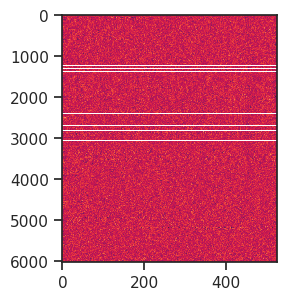

In [16]:
plt.imshow(x, aspect=0.1);

In [17]:
f = f'{key}_task-rest_space-CCF3d_desc-rabies-hp_bold.npy'
f = np.load(pjoin(tmp_dir, f))

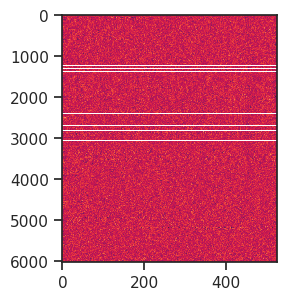

In [18]:
plt.imshow(f, aspect=0.1);

In [4]:
gr = Group('p15-sample', num_k=8, mice=mice, mode='bold-lite').load_group()
_ = gr.avg()
pi_mrg, _ = gr.merge_vis()

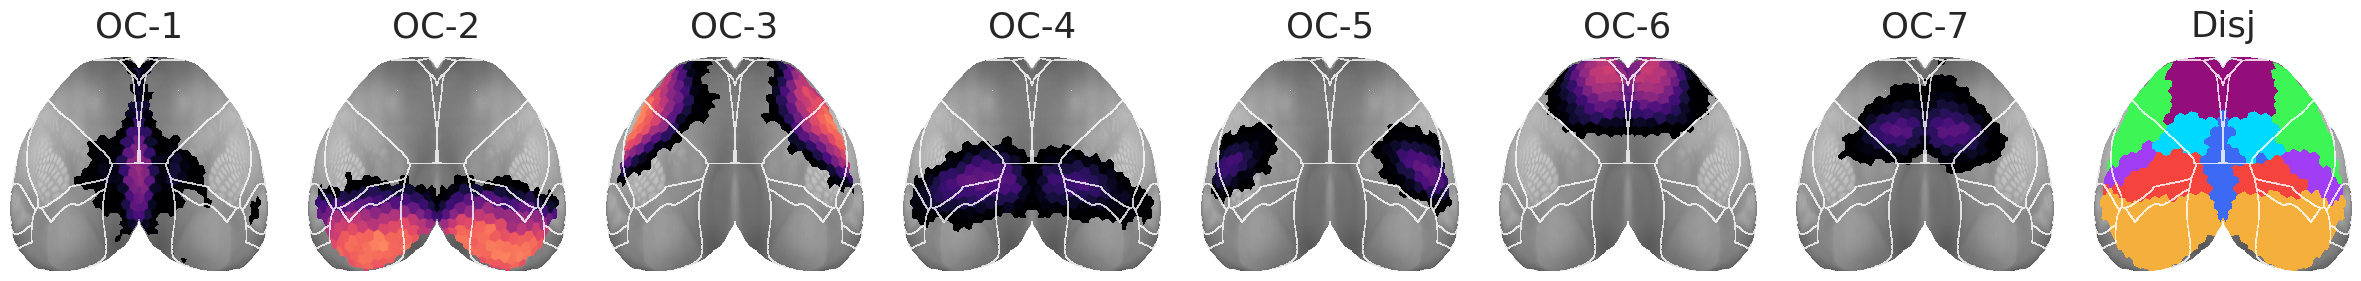

In [5]:
gr.show(pi_mrg, **show_kws(7));

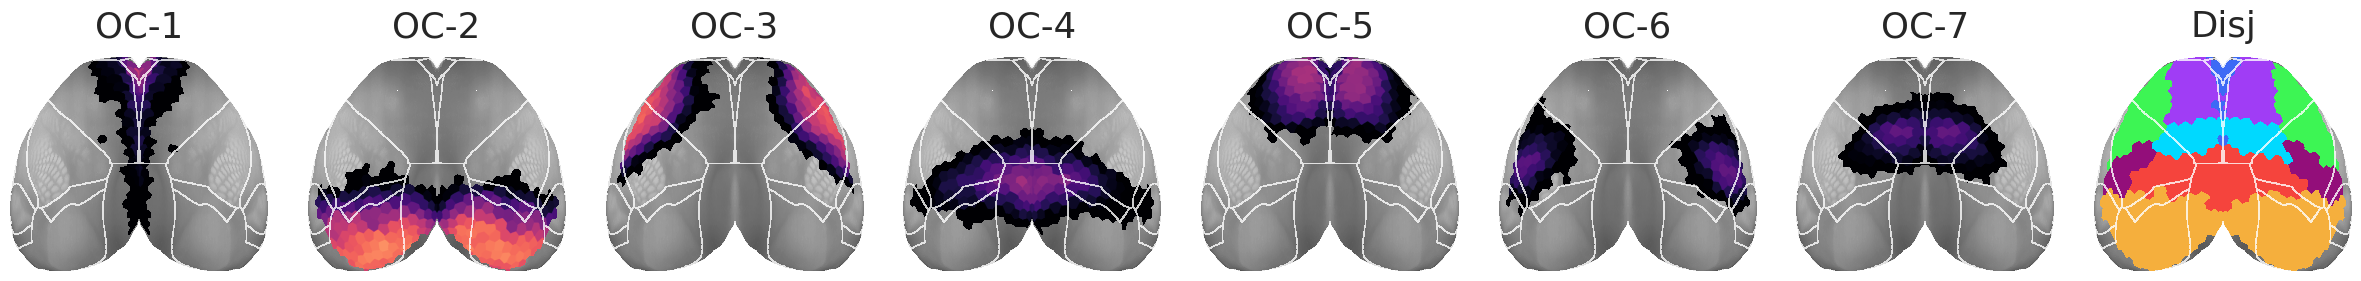

In [8]:
## Was before discovering of many nodes missing (from eroded)

## BOLD

In [9]:
gr = Group('p15-sample', num_k=8, mice=mice, mode='bold').load_group()
_ = gr.avg()

In [10]:
show_kws(7)

{
    'vmin': 0.2,
    'vmax': 0.9,
    'mask_thresh': 0.14285714285714285,
    'label_fontsize': 16,
    'add_disjoint': True,
    'add_title': True
}

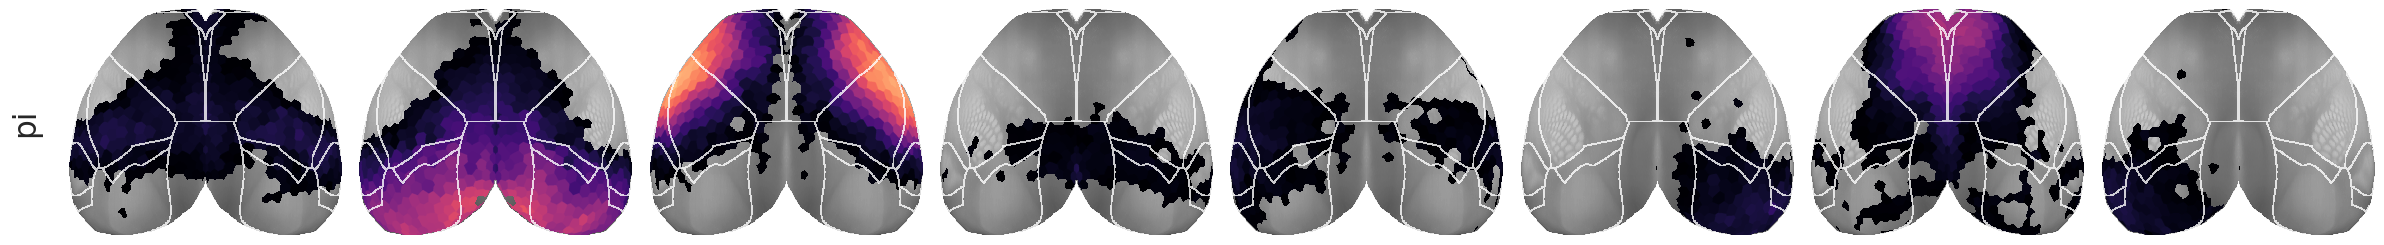

In [15]:
gr.show(layer=0, proj='top', vmin=0.1, vmax=0.8, mask_thresh=0.1);

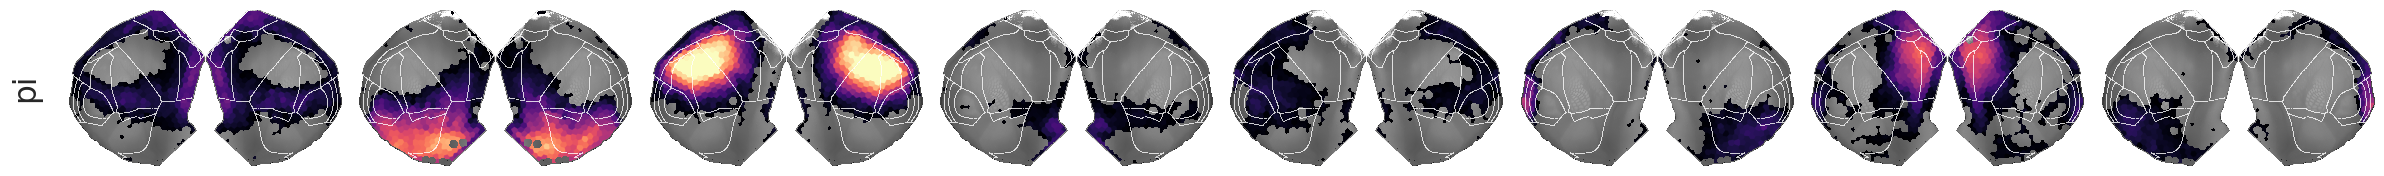

In [17]:
gr.show(layer=0, proj='flat', vmin=0.1, vmax=0.6, mask_thresh=0.1);

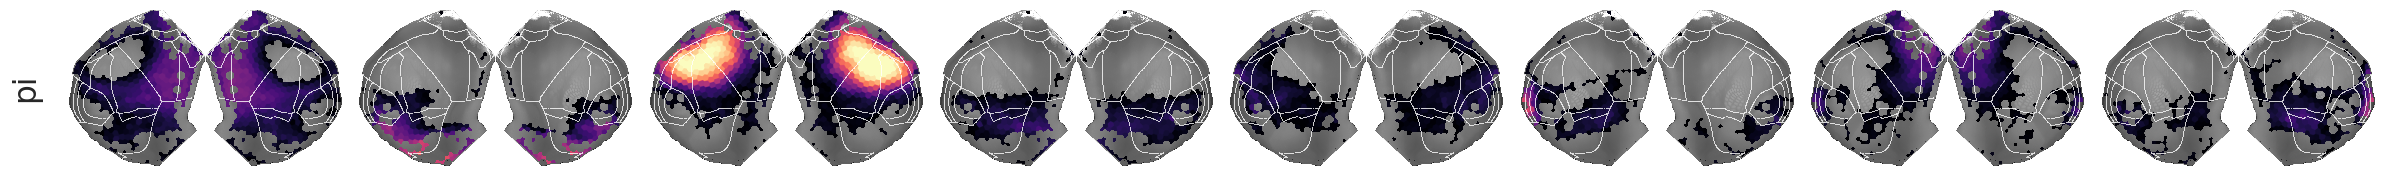

In [19]:
gr.show(layer=2, proj='flat', vmin=0.1, vmax=0.6, mask_thresh=0.1);

In [20]:
pi = gr.get_surface_pi()

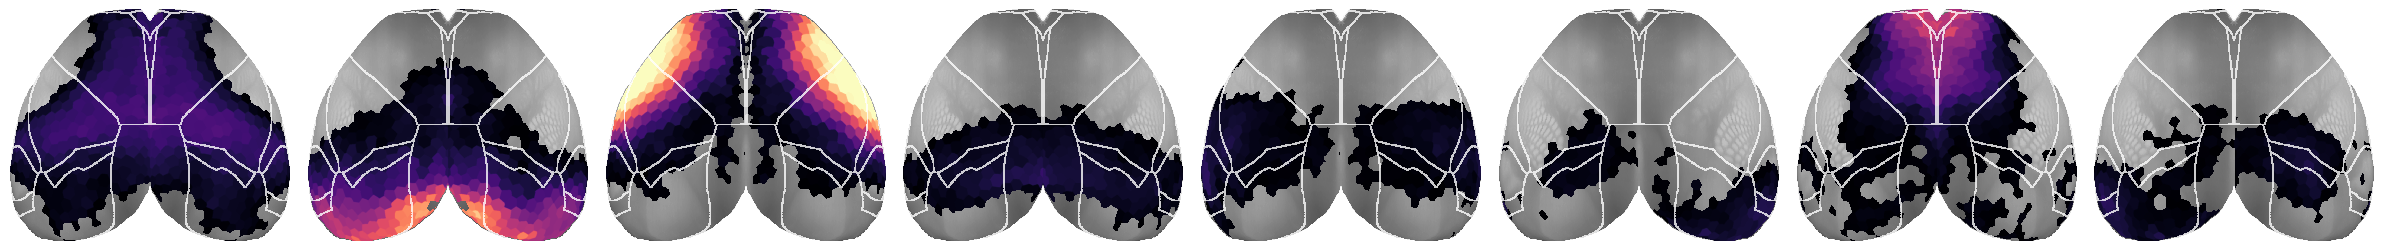

In [22]:
gr.show(pi, proj='top', vmin=0.1, vmax=0.6, mask_thresh=0.1);

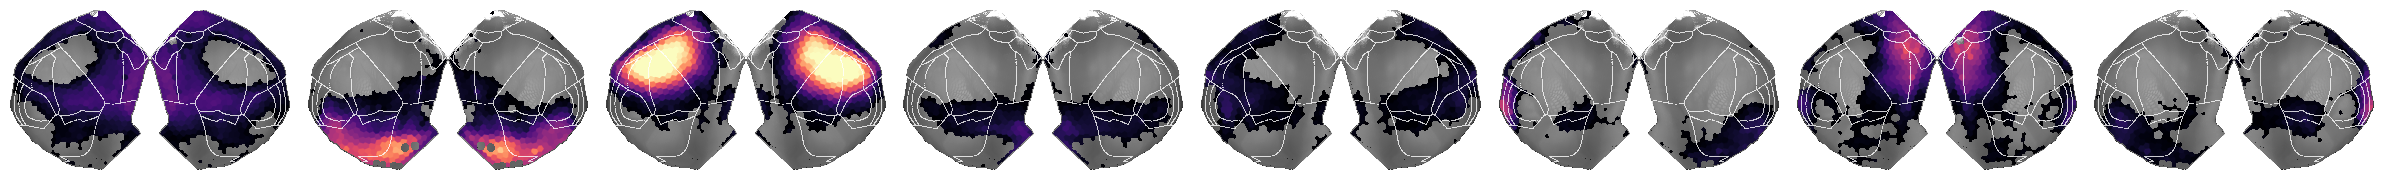

In [23]:
gr.show(pi, proj='flat', vmin=0.1, vmax=0.6, mask_thresh=0.1);

## Sigma

In [63]:
mice = Mice(512)

In [64]:
mice.setup_preproc_data(desc_ca2='sig2')
preproc = dict(filter(
    lambda t: t[1].nii_file,
    mice.ca_preproc.items(),
))

In [65]:
key = 'sub-SLC01_ses-1_run-1'
data = preproc[key].load_ants()
data = data.numpy()[..., 0, :]
data.shape

(256, 250, 6000)

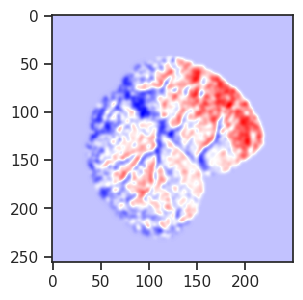

In [66]:
plt.imshow(data[..., 2200], cmap='bwr');

In [67]:
mice.setup_preproc_data(desc_ca2='sig8')
preproc = dict(filter(
    lambda t: t[1].nii_file,
    mice.ca_preproc.items(),
))

In [68]:
key = 'sub-SLC01_ses-1_run-1'
data = preproc[key].load_ants()
data = data.numpy()[..., 0, :]
data.shape

(256, 250, 6000)

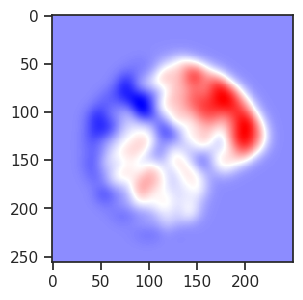

In [69]:
plt.imshow(data[..., 2200], cmap='bwr');

0.0